# Exploring Pandas with Airbnb data

## Dataset

### Milan Airbnb Open Data

- `Airbnb_Milan.csv`

- `csv` : 61 columns extending the previous dataset

- [https://www.kaggle.com/datasets/antoniokaggle/milan-airbnb-open-data-only-entire-apartments](https://www.kaggle.com/datasets/antoniokaggle/milan-airbnb-open-data-only-entire-apartments)

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [4]:
datafile = '/Users/flint/Data/milan/Airbnb_Milan.csv'
milan = pd.read_csv(datafile, index_col=0)

In [16]:
milan

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
1,73892,387110,1,1,57,0,3,1,1,1,...,1,0,0,0,0,0,0,0,1,0
2,74169,268127,1,1,57,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,77958,387110,1,1,57,0,3,1,1,1,...,1,0,0,0,0,0,0,0,1,0
4,93025,499743,1,1,57,0,1,1,0,1,...,1,0,1,1,0,0,1,0,0,0
5,132705,391011,1,1,57,1,2,1,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,35954783,56584596,1,1,57,0,1,1,1,9,...,1,0,0,0,0,0,0,0,0,0
9319,36023503,271013325,1,1,57,0,1,1,0,9,...,1,0,0,0,0,0,1,0,0,0
9320,36071908,271354203,1,0,57,0,1,1,0,9,...,0,1,0,0,0,0,0,0,0,0
9321,36305676,171239896,1,1,40,0,3,1,0,9,...,1,0,0,0,0,0,0,0,0,0


In [19]:
milan['daily_price']

1        94
2       125
3       100
4       120
5        70
       ... 
9318     80
9319    900
9320     70
9321     65
9322     75
Name: daily_price, Length: 9322, dtype: int64

In [22]:
milan.iloc[3]

id                                            93025
host_id                                      499743
host_location                                     1
host_response_time                                1
host_response_rate                               57
host_is_superhost                                 0
host_total_listings_count                         1
host_has_profile_pic                              1
host_identity_verified                            0
neighbourhood_cleansed                            1
zipcode                                       20121
latitude                                   45.47204
longitude                                    9.1964
room_type                           Entire home/apt
accommodates                                      3
bathrooms                                         3
bedrooms                                          1
beds                                              2
bed_type                                          1
daily_price 

In [24]:
milan[['daily_price', 'review_scores_rating']].loc[[3, 5, 9318]]

,daily_price,review_scores_rating
3,100,97
5,70,90
9318,80,100


In [26]:
milan['daily_price'] > 100

1       False
2        True
3       False
4        True
5       False
        ...  
9318    False
9319     True
9320    False
9321    False
9322    False
Name: daily_price, Length: 9322, dtype: bool

In [32]:
m = milan[['review_scores_rating']]
m.loc[
    milan['daily_price'] > 100
]

,review_scores_rating
2,100
4,97
6,98
7,96
8,98
...,...
9304,80
9313,100
9314,80
9317,100


In [33]:
milan[['daily_price', 'review_scores_rating']].loc[
    (milan['daily_price'] > 100) & (milan['review_scores_rating'] > 90)
]

,daily_price,review_scores_rating
2,125,100
4,120,97
6,200,98
7,700,96
8,250,98
...,...,...
9295,105,100
9301,3000,100
9313,160,100
9317,105,100


## First insight over data

In [37]:
milan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9322 entries, 1 to 9322
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                9322 non-null   int64  
 1   host_id                           9322 non-null   int64  
 2   host_location                     9322 non-null   int64  
 3   host_response_time                9322 non-null   int64  
 4   host_response_rate                9322 non-null   int64  
 5   host_is_superhost                 9322 non-null   int64  
 6   host_total_listings_count         9322 non-null   int64  
 7   host_has_profile_pic              9322 non-null   int64  
 8   host_identity_verified            9322 non-null   int64  
 9   neighbourhood_cleansed            9322 non-null   int64  
 10  zipcode                           9322 non-null   int64  
 11  latitude                          9322 non-null   float64
 12  longit

### Convert on import

In [42]:
conv = {
    'review_scores_rating': lambda x: int(x) / 10,
    'review_scores_accuracy': lambda x: int(x) / 10,
    'review_scores_cleanliness': lambda x: int(x) / 10,
    'review_scores_checkin': lambda x: int(x) / 10,
    'review_scores_communication': lambda x: int(x) / 10,
    'review_scores_location': lambda x: int(x) / 10,
    'review_scores_value': lambda x: int(x) / 10,
}
milan = pd.read_csv(datafile, index_col=0, converters=conv)

In [43]:
milan.review_scores_accuracy

1       0.9
2       1.0
3       0.9
4       1.0
5       0.9
       ... 
9318    1.0
9319    1.0
9320    0.9
9321    1.0
9322    1.0
Name: review_scores_accuracy, Length: 9322, dtype: float64

## Create a map of accommodations with price
- bokeh
- pyplot
- seaborn
- plotly

In [44]:
import matplotlib.pyplot as plt

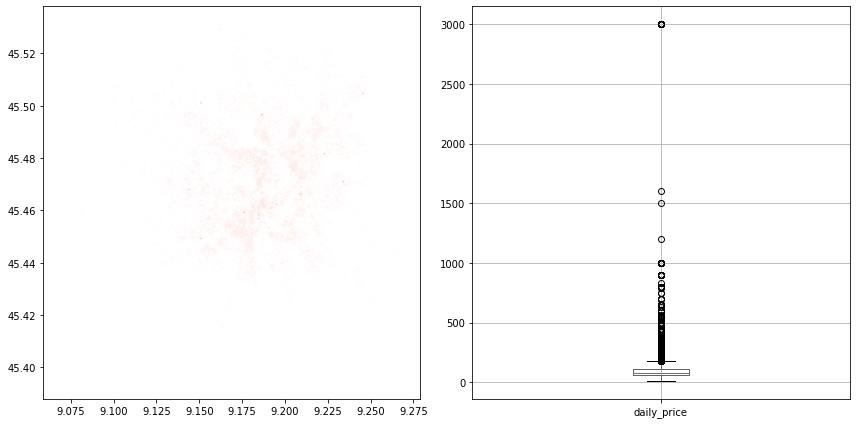

In [84]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2)
ax[0].scatter(milan.longitude, milan.latitude, c=milan.daily_price, 
              alpha=0.1, 
              s=milan.review_scores_accuracy, cmap='Reds')
milan.boxplot(column=['daily_price'])
plt.tight_layout()
plt.show()

### Ideas for handling bad distribution of daily price
- remove outliers
- scale (log, scaling in range, kernel)
- discretize (clustering)